# Initializing the data

In [1]:
# DO NOT IMPORT PANDAS
### Lib imports
import tree as dt
import evaluation as ev
import numpy as np
import copy
import config as cfg
import cross_val as cv
import tree_plot as tp

In [2]:
data = np.loadtxt('clean_dataset.txt')

In [3]:
best_hyper, F1_score, err_all_hyperparams = cv.param_tuning(data, folds=10, test_percentage=0.1)

Running with hyperparameters: {'depth': 2, 'boundary': 2, 'prune': True}
-------------------- Eval/Train separation 0 --------------------
-------------------- Eval/Train separation 1 --------------------


/home/sacha/Bureau/Imperial/Intro_to_ML/decision_tree/evaluation.py:57: RuntimeWarning: invalid value encountered in double_scalars
  confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]),


-------------------- Eval/Train separation 2 --------------------
-------------------- Eval/Train separation 3 --------------------
-------------------- Eval/Train separation 4 --------------------
-------------------- Eval/Train separation 5 --------------------
-------------------- Eval/Train separation 6 --------------------
-------------------- Eval/Train separation 7 --------------------
-------------------- Eval/Train separation 8 --------------------
-------------------- Eval/Train separation 9 --------------------
Running with hyperparameters: {'depth': 4, 'boundary': 2, 'prune': True}
-------------------- Eval/Train separation 0 --------------------
-------------------- Eval/Train separation 1 --------------------
-------------------- Eval/Train separation 2 --------------------
-------------------- Eval/Train separation 3 --------------------
-------------------- Eval/Train separation 4 --------------------
-------------------- Eval/Train separation 5 --------------------
---

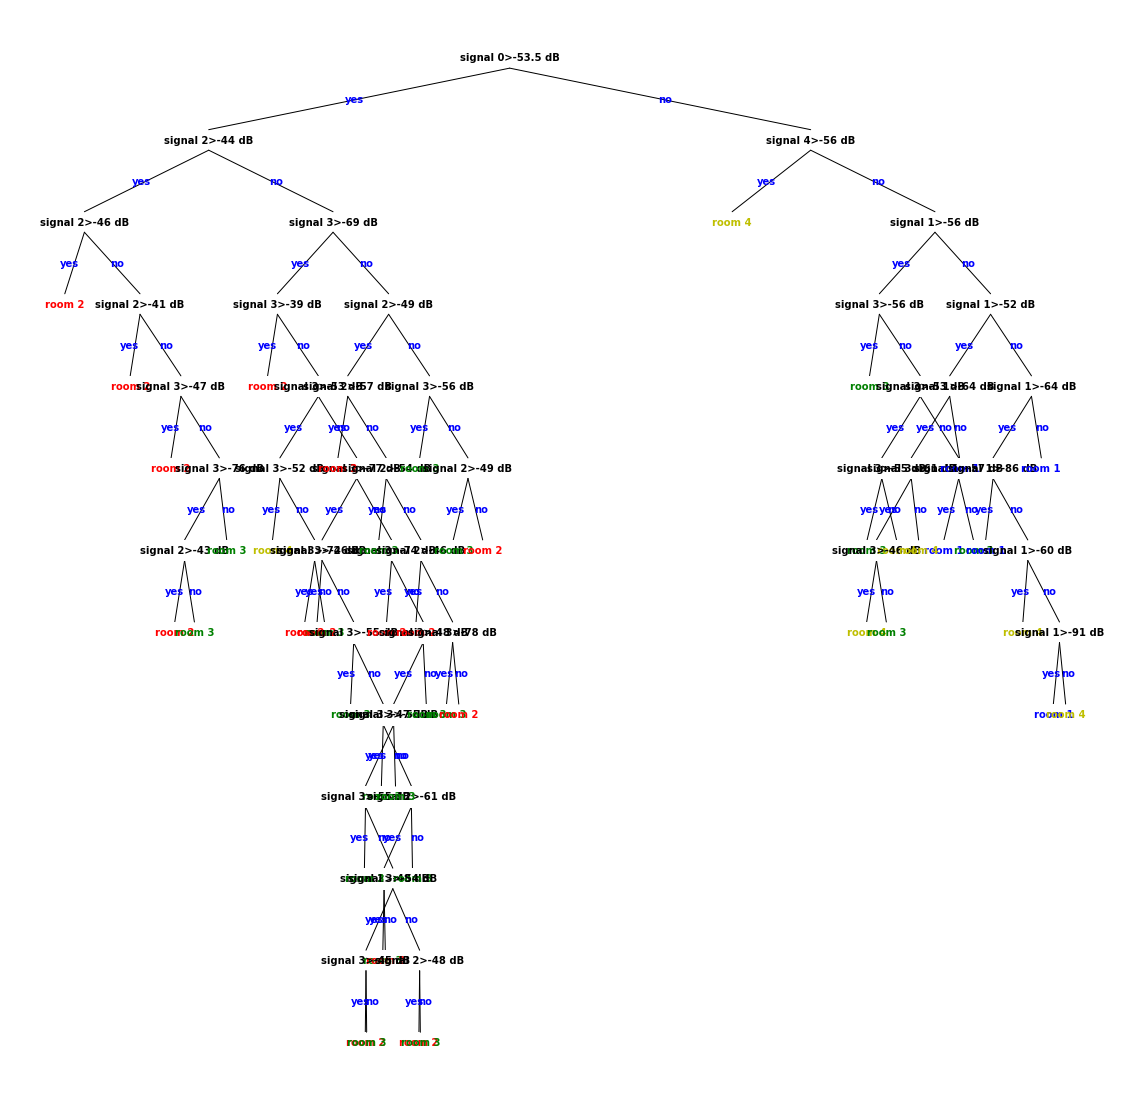

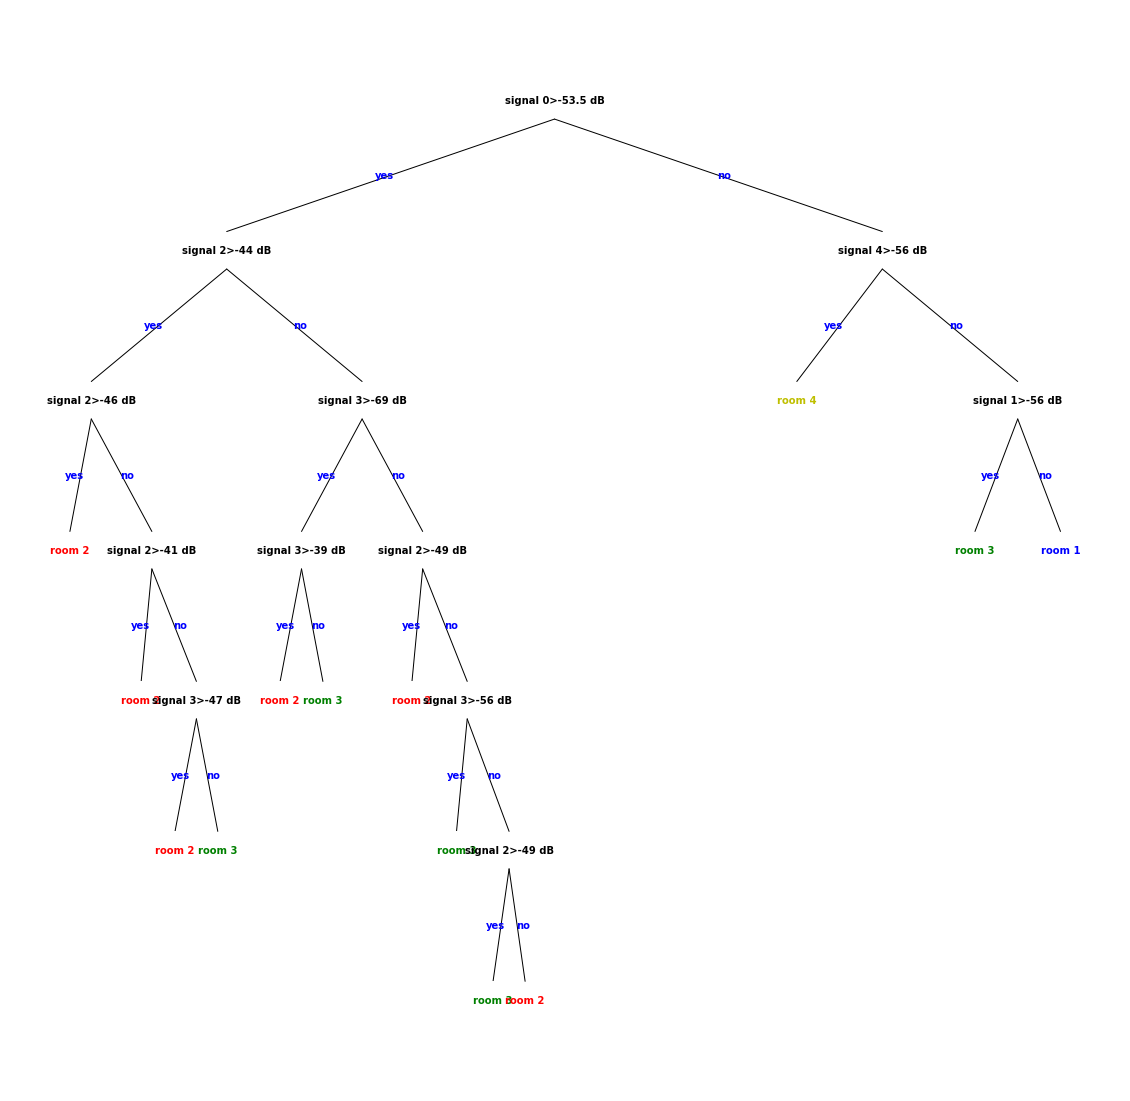

In [4]:
tree = tp.final_plot(best_hyper, data= "clean_dataset")

In [ ]:
best_hyper


In [5]:
correct = 0
data = np.loadtxt('noisy_dataset.txt')
for i in range(data.shape[0]):
    if ev.predict(tree, data[i,:]) == data[i,-1]:
        correct +=1
print(correct/i)

0.8994497248624312


In [10]:
def compute_CM(dataset, tree):
    confusion_matrix = np.zeros((cfg.NB_LABELS, cfg.NB_LABELS))

    for i in range(dataset.shape[0]):  # For each line from the validation set

        if (
            ev.predict(tree, dataset[i, :]) == dataset[i, -1]
        ):  # If the tree predicted the label correctly
            confusion_matrix[
                int(dataset[i, -1]) - 1, int(dataset[i, -1]) - 1
            ] += 1  # At position (correct label, correct label) we add 1

        elif (
            ev.predict(tree, dataset[i, :]) != dataset[i, -1]
        ):  # If the tree predicted wrongly
            confusion_matrix[
                int(dataset[i, -1]) - 1,
                int(ev.predict(tree, dataset[i, :])) - 1,
            ] += 1  # At position (correct label, predicted label) we add 1
    return confusion_matrix

In [11]:
compute_CM(data, tree)

array([[445.,  10.,  15.,  20.],
       [ 18., 444.,  24.,  11.],
       [ 21.,  17., 463.,  14.],
       [ 24.,  14.,  14., 446.]])